In [1]:
import requests
import json
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import re
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import shapely.wkt

%matplotlib inline

In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

In [4]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/23'



headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [5]:
def concat_frames_columns_lno(geo_response, response, date_range, time_range='6:00pm-11:59pm', days='m-f', in_or_out='outbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    return full_df

In [6]:
params = {
    'direction': '0',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '02-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '02-18-2022',
    'resolution': 'hiRes',
}

In [7]:
lno_janfeb23 = concat_frames_columns_lno(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '01/25/22 - 02/24/22')
lno_janfeb23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.337388,10.486064,10.839,2.799,...,1.876,0.342,387,1.989,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.997423
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.488799,5.544690,66.959,6.228,...,2.741,1.892,383,3.002,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.987113
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,4.473687,4.746197,37.305,11.223,...,1.736,1.573,195,1.861,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.502577
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.328799,10.204831,19.943,3.211,...,1.526,1.265,299,1.611,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.770619
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.536803,15.977975,2.438,1.767,...,1.337,0.274,239,1.394,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.615979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,1.938224,12.212211,6.170,2.249,...,1.645,1.389,214,1.731,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.551546
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.805058,13.059414,10.564,2.308,...,1.303,1.085,294,1.394,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.757732
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,1.872122,12.795106,12.804,2.318,...,1.309,1.096,370,1.396,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.953608
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.137595,11.372126,13.301,3.189,...,1.487,1.203,336,1.558,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.865979


In [8]:
params = {
    'direction': '0',
    'startDate': '02-25-2022',
    'endDate' : '03-26-2022',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '02-25-2022',
    'endDate' : '03-26-2022',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'resolution': 'hiRes',
}

In [9]:
lno_febmarch23 = concat_frames_columns_lno(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '02/25/22 - 03/26/22')
lno_febmarch23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.392828,10.243110,6.740,2.949,...,1.908,1.639,285,1.991,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,0.996503
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.266427,5.833687,33.895,6.299,...,2.633,2.059,286,2.883,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,1.000000
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,3.958928,5.363321,33.029,12.249,...,1.788,1.630,139,1.880,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,0.486014
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.893052,8.214508,64.709,2.650,...,1.529,1.306,211,1.618,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,0.737762
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.631571,15.049912,9.136,1.779,...,1.399,1.274,175,1.465,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,0.611888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,1.953882,12.114345,3.370,2.244,...,1.697,1.468,153,1.748,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,0.534965
905,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.756119,13.423350,5.300,2.187,...,1.329,1.137,227,1.440,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,0.793706
906,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.147000,11.156963,19.668,4.422,...,1.304,1.130,265,1.395,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,0.926573
907,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.169211,11.206379,8.869,3.367,...,1.505,1.166,228,1.590,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,0.797203


In [10]:
params = {
    'direction': '0',
    'startDate': '03-27-2022',
    'endDate' : '04-26-2022',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '04-14-2022,04-15-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '03-27-2022',
    'endDate' : '04-26-2022',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '04-14-2022,04-15-2022',
    'resolution': 'hiRes',
}

In [11]:
lno_marchapr23 = concat_frames_columns_lno(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '03/27/22 - 04/26/22')
lno_marchapr23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.392320,10.245285,10.639,2.956,...,1.853,1.506,350,1.988,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.997151
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.388511,5.671400,94.136,6.060,...,2.674,2.069,348,2.971,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.991453
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,4.089695,5.191830,62.797,11.413,...,1.722,1.506,167,1.854,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.475783
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.765155,8.594455,36.575,2.878,...,1.533,1.288,258,1.609,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.735043
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.665028,14.747500,17.138,1.821,...,1.380,0.270,214,1.448,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.609687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.044839,11.575483,7.323,2.283,...,1.696,1.332,192,1.782,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.547009
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.989864,11.846538,7.789,2.764,...,1.364,1.146,273,1.429,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.777778
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,1.959030,12.227480,10.662,2.715,...,1.337,1.077,336,1.405,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.957265
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.216617,10.966712,7.544,3.378,...,1.506,1.252,311,1.590,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.886040


In [12]:
params = {
    'direction': '0',
    'startDate': '04-27-2022',
    'endDate' : '05-26-2022',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'daysOfWeek' : '1,2,3,4,5',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '04-27-2022',
    'endDate' : '05-26-2022',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'daysOfWeek' : '1,2,3,4,5',
    'resolution': 'hiRes',
}

In [13]:
lno_aprmay23 = concat_frames_columns_lno(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '04/27/22 - 05/26/22')
lno_aprmay23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.388849,10.260171,8.833,2.899,...,1.851,1.527,390,2.012,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,1.000000
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.309730,5.775072,63.010,6.004,...,2.665,1.953,389,2.901,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.997436
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,4.157316,5.107382,36.724,10.373,...,1.726,1.484,187,1.840,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.479487
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.873352,8.270828,63.556,3.899,...,1.449,1.232,298,1.571,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.764103
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.659017,14.800933,18.512,1.826,...,1.385,1.236,237,1.452,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.607692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,1.961639,12.066440,5.438,2.236,...,1.607,0.836,208,1.706,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.533333
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.922878,12.259228,7.747,2.698,...,1.299,1.092,286,1.400,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.733333
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.028348,11.809611,11.970,3.528,...,1.268,1.077,368,1.366,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.943590
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.168342,11.210870,7.231,3.877,...,1.405,1.065,330,1.500,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.846154


In [14]:
params = {
    'direction': '0',
    'startDate': '05-26-2022',
    'endDate' : '06-25-2022',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates' : '05-30-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '05-26-2022',
    'endDate' : '06-25-2022',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates' : '05-30-2022',
    'resolution': 'hiRes',
}

In [15]:
lno_mayjune23 = concat_frames_columns_lno(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '05/26/22 - 06/25/22')
lno_mayjune23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.343601,10.458265,6.659,2.831,...,1.868,1.582,373,2.003,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,1.000000
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,3.948437,6.303507,22.812,5.760,...,2.562,1.894,371,2.783,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.994638
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,3.980522,5.334225,38.195,8.955,...,1.774,1.487,182,1.937,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.487936
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.531636,9.387210,33.674,3.736,...,1.415,1.130,264,1.514,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.707775
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.602640,15.321594,2.968,1.815,...,1.393,1.244,222,1.458,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.595174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.054505,11.521023,9.045,2.264,...,1.569,1.380,196,1.679,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.525469
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.823519,12.927203,6.564,2.363,...,1.266,1.049,268,1.341,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.718499
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,1.952868,12.266062,17.429,2.652,...,1.237,1.042,342,1.331,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.916890
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.095433,11.600944,7.856,3.546,...,1.401,1.088,300,1.488,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.804290


In [16]:
params = {
    'direction': '0',
    'startDate': '06-26-2022',
    'endDate' : '07-26-2022',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates' : '07-04-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '06-26-2022',
    'endDate' : '07-26-2022',
    'beginTime' : '18:00',
    'endTime' : '23:59',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates' : '07-04-2022',
    'resolution': 'hiRes',
}

In [17]:
lno_junejuly23 = concat_frames_columns_lno(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '06/26/22 - 07/26/22')
lno_junejuly23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.376131,10.315088,5.227,2.944,...,1.856,1.481,375,1.973,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.994695
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.075269,6.107327,8.278,6.029,...,2.643,1.655,375,2.920,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.994695
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,5.268880,4.029889,64.981,14.528,...,1.783,1.421,191,1.928,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.506631
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.659053,8.937392,19.360,3.341,...,1.474,1.173,284,1.578,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.753316
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.579465,15.546403,2.980,1.797,...,1.367,1.239,228,1.418,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.604775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.335355,10.135504,18.289,2.519,...,1.677,1.348,203,1.768,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.538462
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.851191,12.733964,7.555,2.359,...,1.308,1.077,262,1.390,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.694960
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.250899,10.641970,18.232,4.561,...,1.289,0.768,355,1.349,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.941645
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,1.951419,12.457089,6.012,2.790,...,1.392,1.186,303,1.513,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.803714


In [18]:
all_lno_inschool = pd.concat([lno_janfeb23, lno_febmarch23, lno_marchapr23, lno_aprmay23])
all_lno_inschool = all_lno_inschool.reset_index() 

all_lno_inschool

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.337388,10.486064,10.839,...,1.876,0.342,387,1.989,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.997423
1,1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.488799,5.544690,66.959,...,2.741,1.892,383,3.002,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.987113
2,2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,4.473687,4.746197,37.305,...,1.736,1.573,195,1.861,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.502577
3,3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.328799,10.204831,19.943,...,1.526,1.265,299,1.611,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.770619
4,4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.536803,15.977975,2.438,...,1.337,0.274,239,1.394,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.615979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,1.961639,12.066440,5.438,...,1.607,0.836,208,1.706,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.533333
3560,881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.922878,12.259228,7.747,...,1.299,1.092,286,1.400,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.733333
3561,882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.028348,11.809611,11.970,...,1.268,1.077,368,1.366,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.943590
3562,883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.168342,11.210870,7.231,...,1.405,1.065,330,1.500,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.846154


In [19]:
all_lno_summer = pd.concat([lno_mayjune23, lno_junejuly23])
all_lno_summer = all_lno_summer.reset_index()

all_lno_summer

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.343601,10.458265,6.659,...,1.868,1.582,373,2.003,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,1.000000
1,1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,3.948437,6.303507,22.812,...,2.562,1.894,371,2.783,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.994638
2,2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,3.980522,5.334225,38.195,...,1.774,1.487,182,1.937,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.487936
3,3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.531636,9.387210,33.674,...,1.415,1.130,264,1.514,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.707775
4,4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.602640,15.321594,2.968,...,1.393,1.244,222,1.458,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.595174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.335355,10.135504,18.289,...,1.677,1.348,203,1.768,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.538462
1766,881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.851191,12.733964,7.555,...,1.308,1.077,262,1.390,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.694960
1767,882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.250899,10.641970,18.232,...,1.289,0.768,355,1.349,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.941645
1768,883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,1.951419,12.457089,6.012,...,1.392,1.186,303,1.513,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.803714


In [20]:
lno_inschool = all_lno_inschool.loc[all_lno_inschool['proportion_of_segments'] >= 0.5]
lno_inschool

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.337388,10.486064,10.839,...,1.876,0.342,387,1.989,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.997423
1,1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.488799,5.544690,66.959,...,2.741,1.892,383,3.002,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.987113
2,2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,4.473687,4.746197,37.305,...,1.736,1.573,195,1.861,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.502577
3,3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.328799,10.204831,19.943,...,1.526,1.265,299,1.611,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.770619
4,4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.536803,15.977975,2.438,...,1.337,0.274,239,1.394,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.615979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,1.961639,12.066440,5.438,...,1.607,0.836,208,1.706,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.533333
3560,881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.922878,12.259228,7.747,...,1.299,1.092,286,1.400,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.733333
3561,882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.028348,11.809611,11.970,...,1.268,1.077,368,1.366,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.943590
3562,883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.168342,11.210870,7.231,...,1.405,1.065,330,1.500,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.846154


In [21]:
lno_summer = all_lno_summer.loc[all_lno_summer['proportion_of_segments'] >= 0.5]
lno_summer

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.343601,10.458265,6.659,...,1.868,1.582,373,2.003,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,1.000000
1,1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,3.948437,6.303507,22.812,...,2.562,1.894,371,2.783,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.994638
3,3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.531636,9.387210,33.674,...,1.415,1.130,264,1.514,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.707775
4,4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.602640,15.321594,2.968,...,1.393,1.244,222,1.458,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.595174
5,5,"LINESTRING (-86.77568 36.24690, -86.77542 36.2...",VILBRIEM,Village Trl & Brick Church Pike Eb,VILMOUEF,Village Trl & Mound Ct Eb,23.641,2.244450,10.533093,7.984,...,1.699,1.499,220,1.793,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.589812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.335355,10.135504,18.289,...,1.677,1.348,203,1.768,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.538462
1766,881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.851191,12.733964,7.555,...,1.308,1.077,262,1.390,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.694960
1767,882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.250899,10.641970,18.232,...,1.289,0.768,355,1.349,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.941645
1768,883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,1.951419,12.457089,6.012,...,1.392,1.186,303,1.513,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.803714


In [22]:
lno_inschool.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,443.789361,24.105646,2.912299,10.596025,29.404374,4.548699,3.362029,2.810530,2.238894,1.928897,1.676431,1.236776,268.475390,1.807139,354.214308,0.757429
std,257.793489,0.723322,3.378529,3.534177,91.819269,7.562189,4.813472,3.382005,1.501973,0.636397,0.409498,0.394694,72.208189,0.494964,41.859722,0.178955
min,0.000000,21.045000,1.352735,0.285236,1.781000,1.541000,1.462000,1.404000,1.329500,1.262000,1.163000,0.268000,145.000000,1.220000,286.000000,0.500000
25%,223.000000,23.734000,1.846177,8.382304,4.262000,2.226000,2.013500,1.881000,1.699250,1.557000,1.392000,1.053000,213.000000,1.484000,351.000000,0.592784
50%,440.000000,24.180000,2.184929,11.001912,7.738000,2.763000,2.354000,2.153000,1.912500,1.742000,1.544000,1.190000,241.000000,1.651000,388.000000,0.717949
75%,663.000000,24.655000,2.871948,13.079235,19.217000,3.984500,3.158500,2.816000,2.380000,2.103000,1.847500,1.432000,342.000000,1.981000,390.000000,0.948718
max,908.000000,24.936000,85.928869,17.874898,1887.486000,124.621000,73.971000,51.952000,33.007000,11.328000,4.902000,2.718000,390.000000,7.200000,390.000000,1.000000


In [23]:
lno_summer.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,436.526667,24.104449,2.936620,10.665733,31.518748,4.671764,3.435299,2.842570,2.230427,1.911750,1.652016,1.282654,280.073939,1.786992,375.014545,0.746824
std,256.527141,0.740482,3.415117,3.641559,107.429878,8.039090,5.016925,3.506041,1.470449,0.706014,0.441561,0.333878,65.824587,0.548749,2.000553,0.175416
min,0.000000,21.045000,1.358429,0.465804,2.147000,1.537000,1.451000,1.412000,1.332000,1.251000,1.155000,0.728000,187.000000,1.207000,373.000000,0.501326
25%,214.250000,23.734000,1.823997,8.273248,4.321000,2.214500,1.984000,1.852250,1.675250,1.523500,1.359000,1.073500,220.250000,1.448250,373.000000,0.589812
50%,431.000000,24.309000,2.182972,11.108791,7.672000,2.813500,2.398000,2.170000,1.883250,1.699000,1.497000,1.184500,248.000000,1.608000,377.000000,0.659997
75%,655.000000,24.715000,2.897248,13.274687,19.183000,4.138250,3.245750,2.853750,2.375000,2.086750,1.821000,1.454000,354.000000,1.979500,377.000000,0.945860
max,884.000000,24.936000,51.841599,17.799973,1831.071000,137.694000,77.063000,56.304000,26.509000,13.356000,5.588000,2.624000,377.000000,8.608000,377.000000,1.000000


In [24]:
eighty_percentile = np.percentile(lno_inschool['percent20Secs'],80)
eighty_percentile

2.116

In [25]:
percent20_inschool_lno = lno_inschool.loc[lno_inschool['percent20Secs'] > eighty_percentile]
percent20_inschool_lno.sort_values('percent20Secs', ascending = False)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
3422,743,"LINESTRING (-86.76054 36.24421, -86.76046 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,24.148,43.065470,0.560728,272.254,...,4.902,2.477,215,7.200,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.551282
762,762,"LINESTRING (-86.76061 36.24400, -86.76054 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,44.089181,0.555919,348.712,...,3.946,2.718,248,6.190,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.639175
1671,786,"LINESTRING (-86.76061 36.24400, -86.76054 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,57.909164,0.423249,1502.796,...,3.973,2.451,189,5.804,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,0.660839
1925,131,"LINESTRING (-86.76864 36.20549, -86.76857 36.2...",DICTRINM,Dickerson Pike & E Trinity Ln Nb,DICTRINN,Dickerson Pike & E Trinty Ln Nb,23.807,29.873960,0.796915,259.471,...,3.339,1.713,349,5.649,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.994302
2812,133,"LINESTRING (-86.76864 36.20549, -86.76857 36.2...",DICTRINM,Dickerson Pike & E Trinity Ln Nb,DICTRINN,Dickerson Pike & E Trinty Ln Nb,23.807,28.306966,0.841030,363.284,...,2.946,1.550,387,4.905,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.992308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,532,"LINESTRING (-86.76544 36.23744, -86.76519 36.2...",OAKSTASN,Oakview Dr & Starlight Dr Sb,CREOAKSN,Creekwood Dr & Oakview Dr Sb,24.737,2.622207,9.433656,14.450,...,2.034,1.738,241,2.120,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.621134
2864,185,"LINESTRING (-86.77149 36.23112, -86.77177 36.2...",CREPARWF,Creekwood Dr & Park Creek Dr Wb,CRERICWN,Creekwood Dr & Richmond Hill Dr Wb,24.923,2.390860,10.424282,5.268,...,2.035,1.428,236,2.120,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.605128
2013,219,"LINESTRING (-86.78049 36.23155, -86.78077 36.2...",EWIBRIWN,Ewing Dr & Brick Church Pike Wb,BRIRICNN,Brick Church Pike & Richmond Hill D,24.936,8.096887,3.079702,79.982,...,1.840,1.353,212,2.119,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.603989
1499,614,"LINESTRING (-86.77228 36.24641, -86.77203 36.2...",MORBRISN,Moorewood Dr & Brickmont Ct Sb,BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,22.734,2.574826,8.829334,4.437,...,2.009,1.823,172,2.117,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,0.601399


In [26]:
lno_inschool.columns

Index(['index', 'geometry', 'fromStopId', 'fromStopName', 'toStopId',
       'toStopName', 'pathLengthMeters', 'averageTravelSeconds',
       'averageTravelSpeed', 'maxSecs', 'percent90Secs', 'percent80Secs',
       'percent70Secs', 'medianSecs', 'percent30Secs', 'percent10Secs',
       'minSecs', 'countForSegment', 'percent20Secs', 'dates', 'time',
       'days_of_week', 'direction', 'max_seg_count', 'proportion_of_segments'],
      dtype='object')

In [27]:
eighty_percentile = np.percentile(lno_summer['percent20Secs'],80)
eighty_percentile

2.1052

In [28]:
percent20_summer_lno = lno_summer.loc[lno_summer['percent20Secs'] > eighty_percentile]
percent20_summer_lno.sort_values('percent20Secs', ascending = False)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
1628,743,"LINESTRING (-86.76054 36.24421, -86.76046 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,24.148,51.841599,0.465804,431.039,...,5.588,2.624,212,8.608,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.562334
743,743,"LINESTRING (-86.76054 36.24421, -86.76046 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,24.148,48.370650,0.499228,267.278,...,4.653,2.205,200,8.034,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.536193
1016,131,"LINESTRING (-86.76864 36.20549, -86.76857 36.2...",DICTRINM,Dickerson Pike & E Trinity Ln Nb,DICTRINN,Dickerson Pike & E Trinty Ln Nb,23.807,25.535403,0.932313,198.973,...,2.895,1.324,375,4.781,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.994695
131,131,"LINESTRING (-86.76864 36.20549, -86.76857 36.2...",DICTRINM,Dickerson Pike & E Trinity Ln Nb,DICTRINN,Dickerson Pike & E Trinty Ln Nb,23.807,22.342477,1.065549,129.167,...,2.963,1.395,367,4.439,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.983914
1618,733,"LINESTRING (-86.76046 36.24442, -86.76038 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,24.148,20.013423,1.206590,222.211,...,3.679,2.624,213,4.325,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.564987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,23,"LINESTRING (-86.76638 36.23937, -86.76637 36.2...",VAISPEEM,Vailview Dr & Spears Rd Eb,OAKSTASN,Oakview Dr & Starlight Dr Sb,23.799,2.636068,9.028219,9.747,...,1.985,1.808,220,2.116,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.589812
1070,185,"LINESTRING (-86.77149 36.23112, -86.77177 36.2...",CREPARWF,Creekwood Dr & Park Creek Dr Wb,CRERICWN,Creekwood Dr & Richmond Hill Dr Wb,24.923,2.340026,10.650736,4.153,...,1.998,1.808,227,2.110,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.602122
394,394,"LINESTRING (-86.75675 36.24307, -86.75669 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,5.274132,4.719070,70.337,...,1.826,1.264,365,2.109,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.978552
879,879,"LINESTRING (-86.75955 36.24248, -86.75982 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.560743,9.571441,16.243,...,1.998,1.707,373,2.108,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,1.000000


In [29]:
slow_lno_inschool = lno_inschool.loc[lno_inschool['percent20Secs'] > 2.44]
slow_lno_inschool.sort_values('percent20Secs', ascending = False)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
3422,743,"LINESTRING (-86.76054 36.24421, -86.76046 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,24.148,43.065470,0.560728,272.254,...,4.902,2.477,215,7.200,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.551282
762,762,"LINESTRING (-86.76061 36.24400, -86.76054 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,44.089181,0.555919,348.712,...,3.946,2.718,248,6.190,01/25/22 - 02/24/22,6:00pm-11:59pm,m-f,outbound,388,0.639175
1671,786,"LINESTRING (-86.76061 36.24400, -86.76054 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,57.909164,0.423249,1502.796,...,3.973,2.451,189,5.804,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,0.660839
1925,131,"LINESTRING (-86.76864 36.20549, -86.76857 36.2...",DICTRINM,Dickerson Pike & E Trinity Ln Nb,DICTRINN,Dickerson Pike & E Trinty Ln Nb,23.807,29.873960,0.796915,259.471,...,3.339,1.713,349,5.649,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.994302
2812,133,"LINESTRING (-86.76864 36.20549, -86.76857 36.2...",DICTRINM,Dickerson Pike & E Trinity Ln Nb,DICTRINN,Dickerson Pike & E Trinty Ln Nb,23.807,28.306966,0.841030,363.284,...,2.946,1.550,387,4.905,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.992308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,825,"LINESTRING (-86.77266 36.16885, -86.77241 36.1...",UNI2AEF,Union St & 2nd Ave Eb,1SWOONM,S 1st St & Woodland St Nb,24.428,6.162576,3.963927,49.833,...,2.226,1.036,257,2.448,02/25/22 - 03/26/22,6:00pm-11:59pm,m-f,outbound,286,0.898601
2650,856,"LINESTRING (-86.76008 36.24235, -86.76018 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.850491,8.598519,10.639,...,2.272,1.713,350,2.447,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.997151
2999,320,"LINESTRING (-86.77442 36.17631, -86.77445 36.1...",N1SOLDNM,N 1st St & Oldham St Nb,DICGRANN,Dickerson Pike & Grace St Nb,24.446,6.305950,3.876656,95.910,...,2.021,1.387,377,2.446,04/27/22 - 05/26/22,6:00pm-11:59pm,m-f,outbound,390,0.966667
2102,308,"LINESTRING (-86.77438 36.17609, -86.77442 36.1...",N1SOLDNM,N 1st St & Oldham St Nb,DICGRANN,Dickerson Pike & Grace St Nb,24.446,3.899465,6.269065,21.164,...,2.071,1.445,333,2.444,03/27/22 - 04/26/22,6:00pm-11:59pm,m-f,outbound,351,0.948718


In [30]:
slow_lno_summer = lno_summer.loc[lno_summer['percent20Secs'] > 2.414]
slow_lno_summer.sort_values('percent20Secs', ascending = False)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
1628,743,"LINESTRING (-86.76054 36.24421, -86.76046 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,24.148,51.841599,0.465804,431.039,...,5.588,2.624,212,8.608,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.562334
743,743,"LINESTRING (-86.76054 36.24421, -86.76046 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,24.148,48.370650,0.499228,267.278,...,4.653,2.205,200,8.034,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.536193
1016,131,"LINESTRING (-86.76864 36.20549, -86.76857 36.2...",DICTRINM,Dickerson Pike & E Trinity Ln Nb,DICTRINN,Dickerson Pike & E Trinty Ln Nb,23.807,25.535403,0.932313,198.973,...,2.895,1.324,375,4.781,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.994695
131,131,"LINESTRING (-86.76864 36.20549, -86.76857 36.2...",DICTRINM,Dickerson Pike & E Trinity Ln Nb,DICTRINN,Dickerson Pike & E Trinty Ln Nb,23.807,22.342477,1.065549,129.167,...,2.963,1.395,367,4.439,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.983914
1618,733,"LINESTRING (-86.76046 36.24442, -86.76038 36.2...",DWMRT,Dickerson Rd Wal Mart,DWMRTX,Dickerson Rd Walmart Exit,24.148,20.013423,1.206590,222.211,...,3.679,2.624,213,4.325,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.564987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,801,"LINESTRING (-86.77266 36.16885, -86.77241 36.1...",UNI2AEF,Union St & 2nd Ave Eb,1SWOONM,S 1st St & Woodland St Nb,24.428,6.164444,3.962726,52.066,...,2.160,1.419,315,2.429,05/26/22 - 06/25/22,6:00pm-11:59pm,m-f,outbound,373,0.844504
1525,640,"LINESTRING (-86.77536 36.23521, -86.77549 36.2...",MOOWILSF,Moorewood Dr & Wilmoth Rd Sb,RICVAIWN,Richmond Hills Dr & Vailview Dr Wb,23.026,3.676346,6.263284,11.439,...,2.139,1.544,208,2.427,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.551724
1565,680,"LINESTRING (-86.77278 36.24645, -86.77253 36.2...",MORBRISN,Moorewood Dr & Brickmont Ct Sb,BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,22.734,3.077233,7.387806,8.260,...,2.278,1.889,227,2.425,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.602122
1063,178,"LINESTRING (-86.78077 36.23157, -86.78104 36.2...",EWIBRIWN,Ewing Dr & Brick Church Pike Wb,BRIRICNN,Brick Church Pike & Richmond Hill D,24.936,6.449947,3.866078,45.594,...,1.933,1.360,228,2.418,06/26/22 - 07/26/22,6:00pm-11:59pm,m-f,outbound,377,0.604775


In [31]:
slow_lno_inschool.groupby(['index']).mean().sort_values('percent20Secs', ascending = False)

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
index,,,,,,,,,,,,,,,
762,24.510,44.089181,0.555919,348.7120,104.135,68.5570,50.277,24.8280,8.6000,3.946,2.7180,248.0,6.190,388.0,0.639175
131,23.807,29.873960,0.796915,259.4710,67.123,48.7820,34.761,18.7100,10.1410,3.339,1.7130,349.0,5.649,351.0,0.994302
743,24.148,40.235138,0.603157,304.7175,110.414,63.8835,44.315,15.8770,7.6835,4.176,2.2585,205.5,5.608,370.5,0.554843
133,23.807,28.306966,0.841030,363.2840,71.291,45.8450,30.546,16.9560,8.5220,2.946,1.5500,387.0,4.905,390.0,0.992308
143,23.807,22.851135,1.041830,199.7090,52.865,37.3810,27.926,11.9110,6.2830,2.876,0.6190,260.0,4.567,286.0,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,24.555,3.176780,7.729525,9.9010,4.457,3.7090,3.199,2.8420,2.5180,2.221,1.7270,173.0,2.451,286.0,0.604895
659,24.428,2.980389,8.196246,9.1490,3.599,3.3140,3.157,2.8780,2.5760,2.303,1.0360,257.0,2.451,286.0,0.898601
449,23.734,3.452450,6.874538,7.1600,5.209,4.3820,3.830,3.1680,2.6530,2.187,1.0960,220.0,2.451,388.0,0.567010


In [32]:
slow_lno_summer.groupby(['index']).mean().sort_values('percent20Secs', ascending = False)

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
index,,,,,,,,,,,,,,,
743,24.148,50.106125,0.482516,349.1585,137.3715,76.8430,55.2435,25.95125,12.9940,5.1205,2.4145,206.0,8.3210,375.0,0.549264
131,23.807,23.938940,0.998931,164.0700,60.3610,41.8660,30.0420,14.01300,6.5155,2.9290,1.3595,371.0,4.6100,375.0,0.989305
733,24.148,20.013423,1.206590,222.2110,51.0300,20.1190,13.7720,8.18800,5.2940,3.6790,2.6240,213.0,4.3250,377.0,0.564987
764,24.510,49.504788,0.496135,1795.0915,50.4930,11.1530,7.8105,5.69150,4.4200,3.3935,2.3465,242.0,3.9750,375.0,0.645252
32,24.889,26.763500,0.930110,119.0820,66.9010,50.7055,38.3005,14.15400,5.1600,3.0035,1.7130,369.0,3.8875,375.0,0.984028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,22.734,3.035846,7.489913,7.7690,4.1340,3.4660,3.1955,2.78350,2.5695,2.2915,1.8825,226.5,2.4415,375.0,0.604010
588,24.737,3.094231,7.994555,31.5400,3.7310,3.3730,3.1060,2.76700,2.5230,2.3150,1.9190,221.0,2.4400,377.0,0.586207
72,23.879,2.889218,8.264866,5.1780,3.5940,3.2470,3.0150,2.78900,2.5270,2.3200,1.9780,193.0,2.4340,373.0,0.517426


<AxesSubplot:>

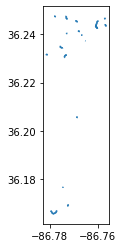

In [33]:
#plot(figsize = 17, 10)
slow_lno_summer.plot()

<AxesSubplot:>

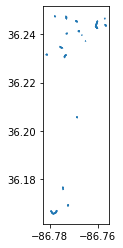

In [34]:
slow_lno_inschool.plot()

In [35]:
slow_lno_inschool_geojson = slow_lno_inschool['geometry'].to_json()

In [36]:
slow_lno_summer_geojson = slow_lno_summer['geometry'].to_json()

In [38]:
all_lno_inschool_geojson = all_lno_inschool['geometry'].to_json()

In [42]:
lno23_map = folium.Map(location =  [36.19, -86.7775], zoom_start = 13)
style1 = {'color': 'red', 'weight' :6}
folium.GeoJson(slow_lno_inschool_geojson, style_function=lambda x: style1).add_to(lno23_map)
style2 = {'color': 'blue', 'weight' :3}
folium.GeoJson(slow_lno_summer_geojson, style_function=lambda x: style2).add_to(lno23_map)
style3 = {'color': 'gray', 'weight' :1}
folium.GeoJson(all_lno_inschool_geojson, style_function=lambda x: style3).add_to(lno23_map)
lno23_map